In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as mpl
import matplotlib.cm as cm



In [4]:
# read files 
prefix = "/Users/leo/C++/ArgonSimulations/0.6_200_5.0"
with open(prefix +'_x_initial.txt', 'r') as file: 
    x0 = [float(line.rstrip()) for line in file]
with open(prefix +'_y_initial.txt', 'r') as file: 
    y0 = [float(line.rstrip()) for line in file]
with open(prefix +'_vx_initial.txt', 'r') as file: 
    vx0 = [float(line.rstrip()) for line in file]
with open(prefix +'_vy_initial.txt', 'r') as file: 
    vy0 = [float(line.rstrip()) for line in file]

N = 200
rho_star = 0.6
x0 = np.array(x0)
y0 = np.array(y0)
vx0 = np.array(vx0)
vy0 = np.array(vy0)

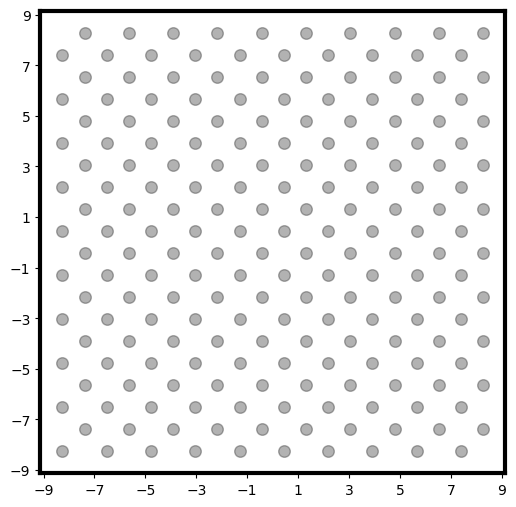

In [5]:
L  =(np.sqrt(N/(rho_star)))
plt.figure(figsize = (6,6))
plt.scatter(x0, y0, color = 'k', s = 70, alpha = 0.3)
plt.xlim(-L/2, L/2)
plt.ylim(-L/2,  L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4x/bmt6t_kn6kj7kj6_jg6724p00000gn/T/ipykernel_75351/3874053235.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.colorbar(q, label= '$|v|$ [$\sqrt{\epsilon/m}$]')


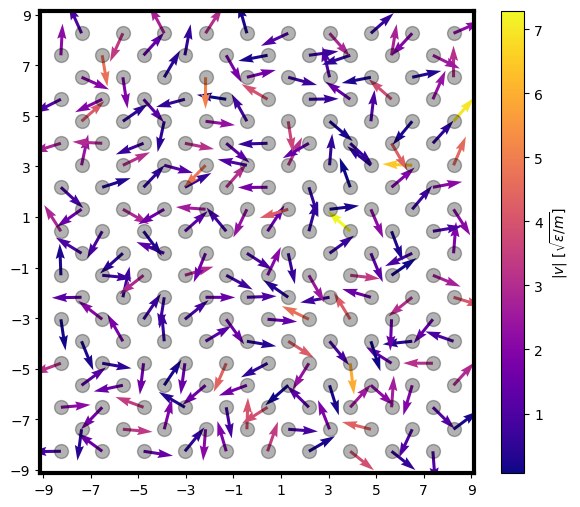

In [163]:
## Plot initial velocities

plt.figure(figsize = (7,6))

magnitude = np.sqrt(vx0**2 + vy0**2)
u = vx0/magnitude
v = vy0/magnitude

q= plt.quiver(x0, y0, u, v, magnitude, angles = "xy", scale_units = "xy", scale =0.8, cmap = 'plasma', width = 0.007)
plt.colorbar(q, label= '$|v|$ [$\sqrt{\epsilon/m}$]')
plt.scatter(x0, y0, color = 'k', s= 100, alpha = 0.3)
plt.xlim(-L/2, L/2)
plt.ylim(-L/2,  L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

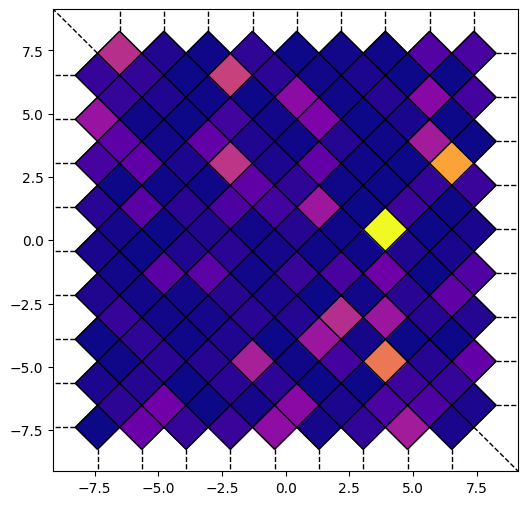

In [164]:
### Voronoi

speed = np.array(vx0**2 + vy0**2)

points = np.vstack((x0, y0)).T
vor = Voronoi(points)
vor = Voronoi(points)

# find min/max values for normalization
minima = min(speed)
maxima = max(speed)

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
fig = voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1)
fig.set_size_inches((6,6))
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r]))
plt.xlim(-L/2, L/2)
plt.ylim(-L/2,  L/2)
plt.show()
